In [1]:
from scipy.fft import fft, fftfreq, fftshift
# import scipy
import matplotlib.pyplot as plt
import numpy as np
# import math
# from numpy import array, ceil, complex, exp, pi, zeros
# from numpy.random import rand, randint, randn
# from numpy.fft import irfft
# from scipy.signal import firwin, lfilter
# __pinv_rcond__ = 1e-8

In [2]:
import helpers
import plots
import iaf
import scipy

In [3]:
dur = 0.1
dt = 1e-4
f = 256
bw = 2*np.pi*f
t = np.arange(0, dur, dt)

u = helpers.gen_band_limited(dur, dt, f)

alpha = 1  # firing param
d = 0.0001  # threshold

dte = 0

z, ys, qs = iaf.iaf_encode(u, dt, alpha, d, dte)

# u_rec = iaf.iaf_decode(z, dur, dt, bw, b, d, k)

In [4]:
ws = []
ws.append(0)
ws

[0]

In [5]:
for idx, value in enumerate(qs[1:]*d):
    w = np.exp(alpha * (t[int(z[idx])] - t[int(z[idx+1])])) * ws[idx] + value
    ws.append(w)

# ws

In [6]:
sk = []
nb = 0
z_copy = z.copy()
for idx, value in enumerate(t):
    if(nb == 0):
        s = 0
    
    s = np.exp(alpha * (t[int(z[nb])] - value)) * ws[nb]
    
    if(nb+1 < z.shape[0]):
        if(idx == int(z[nb+1])):
            nb = nb+1

    sk.append(s)
    
# sk

In [7]:
def rcosfilter(N, beta, Ts, Fs):
    t = (np.arange(N) - N / 2) / Fs
    
#     print(t)
    return np.where(np.abs(2*t) == Ts / beta,
        np.pi / 4 * np.sinc(t/Ts),
        np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts) ** 2)), t

In [8]:
minus_ones = np.where(qs==-1)
# minus_ones

In [9]:
ones = np.where(qs==1)
# ones

In [10]:
minus_ones_idx = z[minus_ones]
# minus_ones_idx

In [11]:
ones_idx = z[ones]
# ones_idx

In [12]:
minus_impulse = scipy.signal.unit_impulse(ys.shape[0], minus_ones_idx) * -1

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


In [13]:
ones_impulse = scipy.signal.unit_impulse(ys.shape[0], ones_idx)
# ones_impulse

In [14]:
impulses = minus_impulse + ones_impulse
impulses = impulses * d

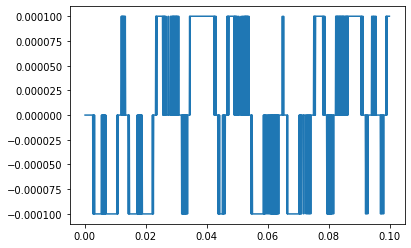

In [15]:
import matplotlib.pyplot as plt

plt.plot(t[1:], impulses)
plt.show()

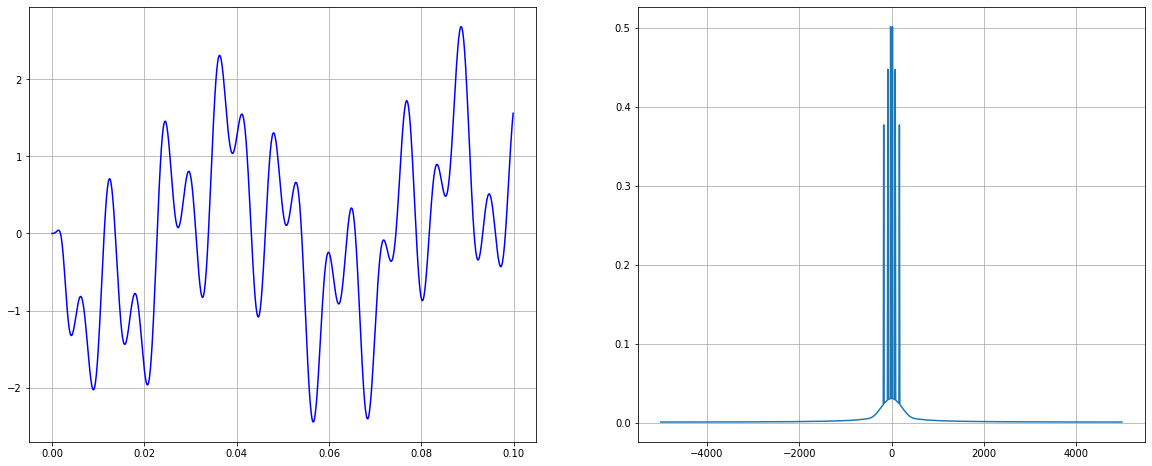

In [16]:
y = u

yf = fft(y)
xf = fftfreq(len(t), dt)
xf = fftshift(xf)

yplot = fftshift(yf)

plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.plot(t, y, 'b')
# plt.plot(t[1:], impulses*1000, 'r')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(xf, 1.0/len(t) * np.abs(yplot))
plt.grid()

plt.show()

In [17]:
df = (1/dt) - 2*f
print(df)
print(1/dt)
print(f)
print(dt)
print(df * 2 / f)

rcos, kp = rcosfilter(len(t), 0.5, 1/f, 1/dt)
rcos.shape



9488.0
10000.0
256
0.0001
74.125


(1000,)

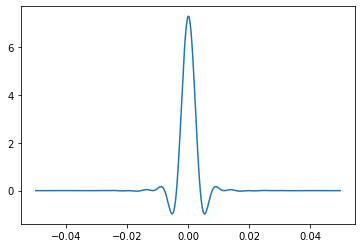

In [18]:
rcos_filtt = scipy.signal.lfilter(b=[alpha, 2*np.pi], a=[1.0], x=rcos)

plt.plot(kp, rcos_filtt)

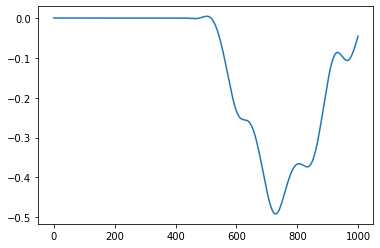

In [19]:
finish = scipy.signal.lfilter(b=rcos, a=[1.0], x = sk)

plt.plot(finish)

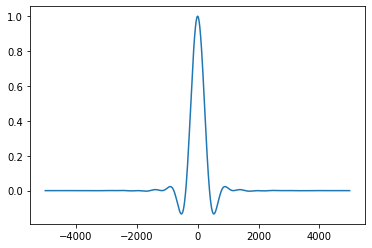

In [20]:
plt.plot(xf, rcos)

In [21]:
# plt.plot(filtered)

In [22]:
filtered = scipy.signal.lfilter(filt, [1.0], sk)
plt.plot(filtered)

NameError: name 'filt' is not defined

In [ ]:
plt.plot(filtered)

In [ ]:
plt.plot(t, sk)

In [ ]:
plt.figure(figsize=(15, 10))
# plt.plot(t[1:], zs, 'b')
plt.plot(t[1:], ys*100, 'r')
plt.plot(t[1:], y[:-1], 'b')

In [ ]:
plt.plot(t, u_rec)

In [ ]:
# output_count += 1
fig_title = 'Signal Encoded Using ASDM Encoder'
print (fig_title)
# s, ys, zs = helpers.func_timer(asdm.asdm_encode)(u, dt, b, d, k)
plots.plot_encoded(t, u, z, fig_title)

In [ ]:
# output_count += 1
fig_title = 'Signal Decoded Using ASDM Decoder'
print (fig_title)
# u_rec = helpers.func_timer(asdm.asdm_decode)(s, dur, dt, bw, b, d, k)
plots.plot_compare(t, u, u_rec, fig_title)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(t, u, 'b')
plt.plot(t, u_rec, 'r')
plt.show()